In [0]:
!apt-get install gnuplot
!pip install snap-stanford

In [0]:
import snap
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Problem 1

In [0]:
wiki = snap.LoadEdgeList(snap.PNGraph,"wiki-Vote.txt",0,1)

In [26]:
snap.PrintInfo(wiki, "wiki Stats", "wiki-info.txt", False)
with open('wiki-info.txt', 'r') as f:
  print(f.read())

wiki Stats: Directed
  Nodes:                    7115
  Edges:                    103689
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         4734
  Zero OutDeg Nodes:        1005
  NonZero In-Out Deg Nodes: 1376
  Unique directed edges:    103689
  Unique undirected edges:  100762
  Self Edges:               0
  BiDir Edges:              5854
  Closed triangles:         608389
  Open triangles:           12720413
  Frac. of closed triads:   0.045645
  Connected component size: 0.993113
  Strong conn. comp. size:  0.182713
  Approx. full diameter:    7
  90% effective diameter:  3.724185



In [27]:
ten_more_out = 0
ten_less_in = 0
for n in wiki.Nodes():
  if n.GetOutDeg() > 10:
    ten_more_out += 1
  if n.GetInDeg() < 10:
    ten_less_in += 1
print('number of nodes with more than 10 outgoing edges: ', ten_more_out)
print('number of nodes with fewer than 10 incoming edges: ', ten_less_in)

number of nodes with more than 10 outgoing edges:  1612
number of nodes with fewer than 10 incoming edges:  5165


Problem 2

In [0]:
out_deg_cnt = dict()
for n in wiki.Nodes():
  out_deg = n.GetOutDeg()
  out_deg_cnt[out_deg] = out_deg_cnt.get(out_deg, 0) + 1

In [0]:
log_x = []
log_y = []
for x, y in sorted(out_deg_cnt.items()):
  if x > 0 and y > 1:
    log_x.append(np.log10(x))
    log_y.append(np.log10(y))

Text(0, 0.5, 'log count')

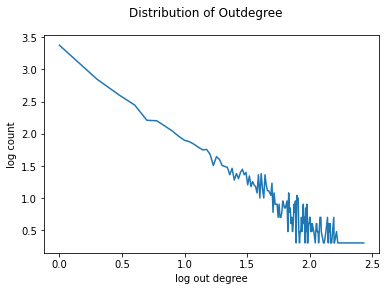

In [50]:
fig = plt.figure()
plt.plot(log_x, log_y)
fig.suptitle('Distribution of Outdegree')
plt.xlabel('log out degree')
plt.ylabel('log count')

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()
lr.fit(np.array(log_x).reshape(-1, 1), log_y)
coef, intercept = lr.coef_[0], lr.intercept_

Text(0, 0.5, 'log count')

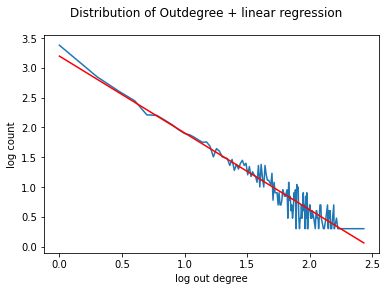

In [62]:
fig = plt.figure()
plt.plot(log_x, log_y)
plt.plot(log_x, coef*np.array(log_x)+intercept, c='red')
fig.suptitle('Distribution of Outdegree + linear regression')
plt.xlabel('log out degree')
plt.ylabel('log count')

Problem 3

In [0]:
sof = snap.LoadEdgeList(snap.PNGraph,"stackoverflow-Java.txt",0,1)

In [69]:
Components = snap.TCnComV()
snap.GetWccs(sof, Components)
print("Number of component: %d" % len(Components))

Number of component: 10143


In [70]:
MxWcc = snap.GetMxWcc(sof)
print("max wcc nodes %d, edges %d" % (MxWcc.GetNodes(), MxWcc.GetEdges()) )

max wcc nodes 131188, edges 322486


In [84]:
PRankH = snap.TIntFltH()
snap.GetPageRank(sof, PRankH)
PRankH.SortByDat(False)
cnt = 0
for id_ in PRankH:
  print(id_, PRankH[id_])
  cnt += 1
  if cnt == 3:
    break

992484 0.013980540412209575
135152 0.010005538895741885
22656 0.007103532693128619


In [86]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(sof, NIdHubH, NIdAuthH)
NIdHubH.SortByDat(False)
NIdAuthH.SortByDat(False)
print('Hubs')
cnt = 0
for id_ in NIdHubH:
  print(id_, NIdHubH[id_])
  cnt += 1
  if cnt == 3:
    break
print()
print('Authorities')
cnt = 0
for id_ in NIdAuthH:
  print(id_, NIdAuthH[id_])
  cnt += 1
  if cnt == 3:
    break

Hubs
892029 0.07336380373389548
1194415 0.05955074418794487
359862 0.05687564588068672

Authorities
22656 0.6047239730413133
157882 0.2986993488728824
571407 0.2839071934144654
